### Import necessary libraies

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import geopandas as gpd
from geopy.geocoders import Nominatim

### Reading tweet_global_warming.csv file

In [6]:
df_vac=pd.read_csv("data/vaccination_tweets.csv")
df = df_vac[["user_location", "text"]]
df = df.dropna()
# selecting random 50 tweets!
df = df.sample(n=50)
df.head()

,user_location,text
9788,Somewhere in Virginia,#COVID19 #PfizerBiontech #VaccineMandates For ...
7287,Glasgow environs.,Checked notes / internet. Oh really? #PfizerBi...
9054,"Oldham, England",So last night I had my 2nd #PfizerBiontech vac...
3430,"Coral Gables, FL","#Vaccination Chronicles\n1. Dec 16, 2020: #Pfi..."
931,France,Switzerland approved the use of the #PfizerBio...


In [7]:
geolocator = Nominatim(user_agent="MSc21")
from geopy.extra.rate_limiter import RateLimiter
locat = df["user_location"]
df_temp = pd.DataFrame({'add': locat})
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
#Applying the method to pandas DataFrame
df['location'] = df_temp['add'].apply(geocode)
df['Lat'] = df['location'].apply(lambda x: x.latitude if x else None)
df['Lon'] = df['location'].apply(lambda x: x.longitude if x else None)

In [9]:
df.head()

,user_location,text,location,Lat,Lon
9788,Somewhere in Virginia,#COVID19 #PfizerBiontech #VaccineMandates For ...,None,NaN,NaN
7287,Glasgow environs.,Checked notes / internet. Oh really? #PfizerBi...,None,NaN,NaN
9054,"Oldham, England",So last night I had my 2nd #PfizerBiontech vac...,"(Oldham, Chadderton, Greater Manchester, North...",53.541580,-2.114783
3430,"Coral Gables, FL","#Vaccination Chronicles\n1. Dec 16, 2020: #Pfi...","(Coral Gables, Miami-Dade County, Florida, Uni...",25.691543,-80.234549
931,France,Switzerland approved the use of the #PfizerBio...,"(France, (46.603354, 1.8883335))",46.603354,1.888334


In [17]:
df = df.dropna()
gdf = gpd.GeoDataFrame(
    df[["user_location", "text"]],
    crs = {'init':'EPSG:4326'},
    geometry=gpd.points_from_xy(df.Lon, df.Lat)
)
gdf.head()

C:\Applications\anaconda3\envs\geopy\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,user_location,text,geometry
9054,"Oldham, England",So last night I had my 2nd #PfizerBiontech vac...,POINT (-2.11478 53.54158)
3430,"Coral Gables, FL","#Vaccination Chronicles\n1. Dec 16, 2020: #Pfi...",POINT (-80.23455 25.69154)
931,France,Switzerland approved the use of the #PfizerBio...,POINT (1.88833 46.60335)
6213,"Stockport, England",Had my first vaccine. Very efficient all round...,POINT (-2.16024 53.40790)
5692,"Sheffield, UK",1st vaccination done - no badge or sticker tho...,POINT (-1.47023 53.38066)


### Plotting the location of given tweets

In [18]:
countries = gpd.read_file("data/countries.shp")

Text(0.5, 1, 'Vaccination Tweets')

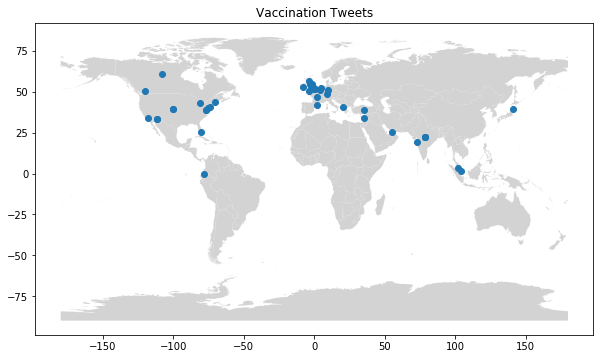

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
countries.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax)
ax.set_title('Vaccination Tweets')

### Function to generate polarity

In [20]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

def get_tweet_polarity(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet) 
    
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

### Applying the above function on the sampled tweets

In [23]:
gdf['polarity'] = gdf['text'].apply(getTextPolarity)
gdf['polarityClass'] = gdf['text'].apply(get_tweet_polarity)
gdf.head()

,user_location,text,geometry,polarity,polarityClass
9054,"Oldham, England",So last night I had my 2nd #PfizerBiontech vac...,POINT (-2.11478 53.54158),0.165,positive
3430,"Coral Gables, FL","#Vaccination Chronicles\n1. Dec 16, 2020: #Pfi...",POINT (-80.23455 25.69154),0.000,neutral
931,France,Switzerland approved the use of the #PfizerBio...,POINT (1.88833 46.60335),0.000,neutral
6213,"Stockport, England",Had my first vaccine. Very efficient all round...,POINT (-2.16024 53.40790),0.275,positive
5692,"Sheffield, UK",1st vaccination done - no badge or sticker tho...,POINT (-1.47023 53.38066),0.000,neutral


### Plotting the polarity values using histogram

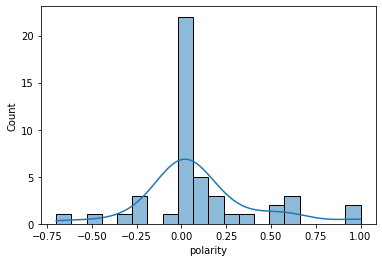

In [26]:
sns.histplot(data=gdf, x="polarity", kde=True)

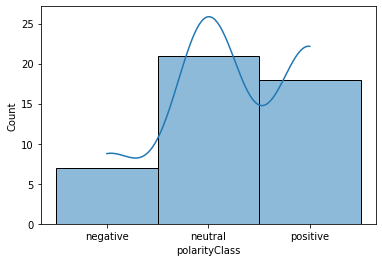

In [27]:
gdf['polarityClass'] = pd.Categorical(gdf['polarityClass'], ['negative','neutral','positive'])
sns.histplot(data=gdf, x="polarityClass", kde=True)

### Function to generate subjectivity


In [29]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

### Applying the above function on the sampled tweets

In [30]:
gdf['subjectivity'] = gdf['text'].apply(getTextSubjectivity)
gdf.head()

,user_location,text,geometry,polarity,polarityClass,subjectivity
9054,"Oldham, England",So last night I had my 2nd #PfizerBiontech vac...,POINT (-2.11478 53.54158),0.165,positive,0.276667
3430,"Coral Gables, FL","#Vaccination Chronicles\n1. Dec 16, 2020: #Pfi...",POINT (-80.23455 25.69154),0.000,neutral,0.000000
931,France,Switzerland approved the use of the #PfizerBio...,POINT (1.88833 46.60335),0.000,neutral,0.000000
6213,"Stockport, England",Had my first vaccine. Very efficient all round...,POINT (-2.16024 53.40790),0.275,positive,0.430556
5692,"Sheffield, UK",1st vaccination done - no badge or sticker tho...,POINT (-1.47023 53.38066),0.000,neutral,0.000000


### Plotting the subjectivity values using histogram

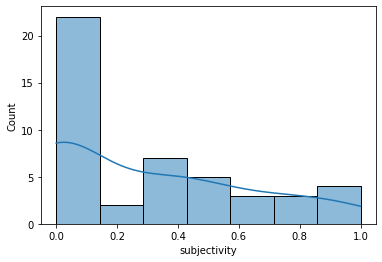

In [31]:
sns.histplot(data=gdf, x="subjectivity", kde=True)

### Geospatial visualisation of the subjectivity corresponding to all the processed tweets

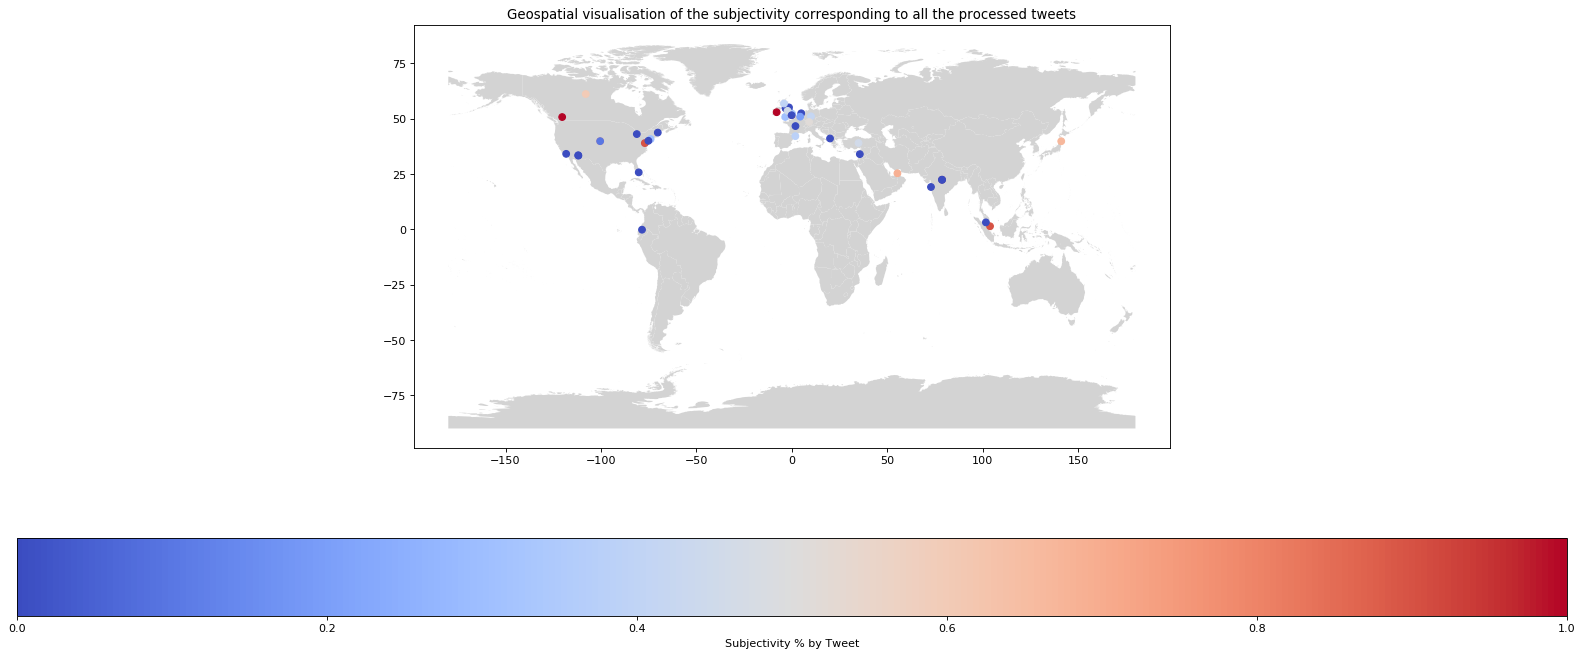

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10), dpi=80) # setting the axis, figure size and dpi for the plot
feature = "subjectivity" # setting the feature for plotting the choropleth map
countries.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
# plotting the map
gdf.plot(column=feature, ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "Subjectivity % by Tweet", 'orientation': "horizontal"})
ax.title.set_text(f"Geospatial visualisation of the subjectivity corresponding to all the processed tweets") # setting the title

In [40]:
# gdf.explore()

### Conclusion

* As seen from the polarity analysis, most of the tweets are neutral. Since most of the tweets are objective as seen from the figure above a very small subset has subjective tweets out of the randomly selected tweets. Moreover, the polarity analysis tells us that, most of the people have written a factual or objective tweet about vaccinations, therefore the most common polarity class of tweets is neutral. 

* The histplots of the polarityClass and the subjectivity has been plot by using seaborn along with their kde. The polarityClass feature is generated by the function get_tweet_polarity which classifies the tweet as positive, negetive or neutral based on their sentiment polarity.

* Moreover the geospatial visualization tells us that higly subjective tweets about the vaccination comes from Canada, Ireland, Middle East and Singapore. However that's based on the randomly selected tweets as per this session. But overall the df only contains a small selection of subjective tweets, with most of them leaning towards being objective in tone.

* Finally the number of positive sentiments are greater than the negetive sentiments from the selected random set of tweets, implying that the people have a positive attitude towards vaccination. After re-running the cells multiple times, the output produces almost the same results, with the randomly selected set of tweets implying that the collective feedback/comments about vaccination is positive.